In [1]:
import matplotlib.pyplot as plt
from labellines import labelLines
import numpy as np

In [56]:
font = {'family' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

In [73]:
startyear = 2010
x = np.arange(startyear, 2101)
dt = x - startyear
Tstart = 1.05
fringe = 0.035
T0 = Tstart + dt * (1.62 - 0.01 * dt) / 100
Tupper = T0 + dt * 1 / 280 * (T0 - Tstart + 0.2) + fringe
Tlower = T0 - dt * 1 / 190 * (T0 - Tstart + 0.2) - fringe

In [122]:
latertime = 2070
laterind = latertime-startyear
np.random.seed(11)
TrealisedSmooth = {
    0: Tstart + (T0-Tstart) * 1.14, 
    1: Tstart + (T0-Tstart) * 0.84
}
Trealised = {}
x2 = np.arange(latertime, 2101)
Tnewplanupper = {}
Tnewplanlower = {}
Tnewmed = {}
for ind in [0, 1]:
    Trealised[ind] = TrealisedSmooth[ind] + (np.random.rand(len(x)) - 0.5) * 0.07
    Tlaterupper = Trealised[ind][laterind] + (T0[laterind:] - T0[laterind]) + (x2 - latertime) * 1 / 280 * (T0[laterind:] - T0[laterind] + 0.2) + fringe
    Tlaterlower = Trealised[ind][laterind] + (T0[laterind:] - T0[laterind]) - (x2 - latertime) * 1 / 190 * (T0[laterind:] - T0[laterind] + 0.2) - fringe
    # Construct a new planned pathway
    Tnewplanupper[ind] = 2.0 + (2.0 - Tlaterupper[0]) * (x2 - 2100) / (2100 - latertime)
    Tnewplanlower[ind] = Tnewplanupper[ind] + Tlaterlower - Tlaterupper
    Tnewmed[ind] = (Tnewplanupper[ind] + Tnewplanlower[ind])/2


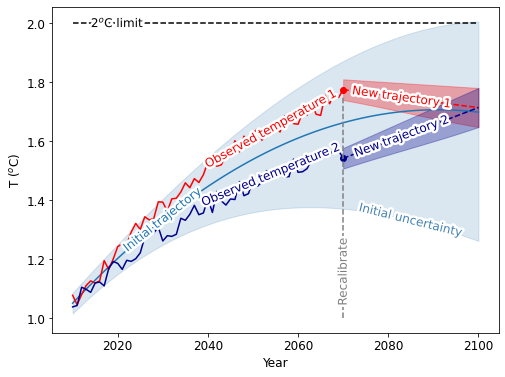

In [144]:
plt.figure(figsize=(8,6))
plt.plot(x, T0, label="Initial trajectory")
plt.fill_between(x, Tupper, Tlower, alpha= 0.2, color="steelblue")
# We use invisible lines to align the text
plt.plot(x,  Tlower, alpha=0.0, label="Initial uncertainty", color="steelblue")
plt.plot(x[:laterind+1], Trealised[0][:laterind+1], color="red")
plt.scatter(latertime, Trealised[0][laterind], color="red")
plt.plot(x[:laterind+1], Trealised[1][:laterind+1], color="darkblue")
plt.plot(x[:laterind+1], TrealisedSmooth[0][:laterind+1], label="Observed temperature 1", color="red", alpha=0.0)
plt.plot(x[:laterind+1], TrealisedSmooth[1][:laterind+1], label="Observed temperature 2", color="darkblue", alpha=0.0)
plt.scatter(latertime, Trealised[1][laterind], color="darkblue")

plt.xlabel("Year")
plt.ylabel("T ($^o$C)")
plt.plot([2010, 2100], [2, 2], linestyle="--", color="black", label="2$^o$C limit")
plt.fill_between(x2, Tnewplanupper[0], Tnewplanlower[0], alpha=0.3, color="red")
plt.plot(x2, Tnewmed[0], linestyle="--", color="red", label="New trajectory 1")
plt.fill_between(x2, Tnewplanupper[1], Tnewplanlower[1], alpha=0.3, color="darkblue")
plt.plot(x2, Tnewmed[1], linestyle="--", color="darkblue", label="New trajectory 2")
plt.plot([latertime, latertime+0.00001], [1, 1.75], color="grey", linestyle="--", label="Recalibrate")
lines = plt.gca().get_lines()
labelLines(lines[:2], align=True, xvals=[2030, 2088])
labelLines(lines[4:6], align=True, xvals=[2054, 2054])
labelLines(lines[6:], align=True, xvals=[2020, 2083, 2083, latertime+0.0000021])
plt.savefig("./output/ConfidenceWindowEvolutionFig.png")

In [130]:
for ind in [0, 1]:
    Trealised[ind] = TrealisedSmooth[ind] + (np.random.rand(len(x)) - 0.5) * 0.07
    Tlaterupper = Trealised[ind][laterind] + (T0[laterind:] - T0[laterind]) + (x2 - latertime) * 1 / 280 * (T0[laterind:] - T0[laterind] + 0.2) + fringe
    Tlaterlower = Trealised[ind][laterind] + (T0[laterind:] - T0[laterind]) - (x2 - latertime) * 1 / 190 * (T0[laterind:] - T0[laterind] + 0.2) - fringe
    # Construct a new planned pathway
    Tnewplanupper[ind] = 1.78 + (1.78 - Tlaterupper[0]) * (x2 - 2100) / (2100 - latertime)
    Tnewplanlower[ind] = Tnewplanupper[ind] + Tlaterlower - Tlaterupper
    Tnewmed[ind] = (Tnewplanupper[ind] + Tnewplanlower[ind])/2

C:\Users\rlamboll\Anaconda3\envs\silicone-3\lib\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_child3), but could not find a label for it.
  warnings.warn(
C:\Users\rlamboll\Anaconda3\envs\silicone-3\lib\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_child5), but could not find a label for it.
  warnings.warn(


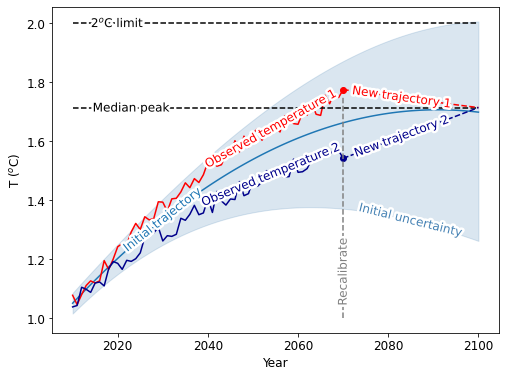

In [143]:
plt.figure(figsize=(8,6))
plt.plot(x, T0, label="Initial trajectory")
plt.fill_between(x, Tupper, Tlower, alpha= 0.2, color="steelblue")
# We use invisible lines to align the text
plt.plot(x,  Tlower, alpha=0.0, label="Initial uncertainty", color="steelblue")
plt.plot(x[:laterind+1], Trealised[0][:laterind+1], color="red")
plt.scatter(latertime, Trealised[0][laterind], color="red")
plt.plot(x[:laterind+1], Trealised[1][:laterind+1], color="darkblue")
plt.plot(x[:laterind+1], TrealisedSmooth[0][:laterind+1], label="Observed temperature 1", color="red", alpha=0.0)
plt.plot(x[:laterind+1], TrealisedSmooth[1][:laterind+1], label="Observed temperature 2", color="darkblue", alpha=0.0)
plt.scatter(latertime, Trealised[1][laterind], color="darkblue")

plt.xlabel("Year")
plt.ylabel("T ($^o$C)")
plt.plot([2010, 2100], [2, 2], linestyle="--", color="black", label="2$^o$C limit")
plt.plot([2010, 2100], [1.712, 1.712], linestyle="--", color="black", label="Median peak")
#plt.fill_between(x2, Tnewplanupper[0], Tnewplanlower[0], alpha=0.3, color="red")
plt.plot(x2, Tnewmed[0], linestyle="--", color="red", label="New trajectory 1")
#plt.fill_between(x2, Tnewplanupper[1], Tnewplanlower[1], alpha=0.3, color="darkblue")
plt.plot(x2, Tnewmed[1], linestyle="--", color="darkblue", label="New trajectory 2")
plt.plot([latertime, latertime+0.00001], [1, 1.75], color="grey", linestyle="--", label="Recalibrate")
lines = plt.gca().get_lines()
labelLines(lines[:2], align=True, xvals=[2030, 2085])
labelLines(lines[2:6], align=True, xvals=[2054, 2054])
labelLines(lines[6:], align=True, xvals=[2020, 2023, 2083, 2083, latertime+0.0000021])
plt.savefig("./output/ConfidenceWindowEvolutionFig_medianTemp.png")